In [5]:
import cv2

In [6]:
import torch

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 경로 설정
data_dir = './Rock-Paper-Scissors'
train_dir = os.path.join(data_dir, 'train2')
test_dir = os.path.join(data_dir, 'test')

# 2. 데이터 전처리
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # 모든 이미지를 64x64로 크기 조정
    transforms.ToTensor(),        # 텐서로 변환
    transforms.Normalize(mean=[0.5], std=[0.5])  # 정규화
])

# 3. 데이터셋 로드
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=25, shuffle=False)

# 클래스 이름 확인
classes = train_dataset.classes
print(f"Classes: {classes}")

# 4. CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 입력 채널: 3, 출력 채널: 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64x64 -> 32x32
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 입력 채널: 32, 출력 채널: 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32 -> 16x16
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # 입력 채널: 64, 출력 채널: 128
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 16x16 -> 8x8
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),               # 128x8x8 -> 8192
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 3)            # 최종 출력: 3 (rock, paper, scissors)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

model = SimpleCNN()

# 5. 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. 학습 루프
def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# 7. 평가 루프
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

# 8. 모델 저장 함수 추가
def save_model(model, save_path):
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

# 모델 학습
train_model(model, train_loader, criterion, optimizer, num_epochs=20)

# 모델 평가
evaluate_model(model, test_loader)

# 학습한 모델 저장
save_path = './rock_paper_scissors_model.pth'  # 저장 파일 경로
save_model(model, save_path)

Classes: ['paper', 'rock', 'scissors']
Epoch 1/20, Loss: 1.1057


KeyboardInterrupt: 

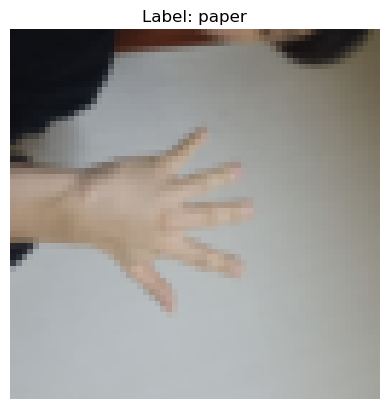

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# train_dataset에서 임의의 데이터 가져오기
def show_sample_image(dataset):
    image, label = dataset[0]  # 첫 번째 이미지를 불러옵니다 (인덱스를 바꿔 임의의 이미지 확인 가능)
    
    # 이미지를 정규화에서 원래대로 되돌리기
    image = image.numpy().transpose((1, 2, 0))  # CxHxW -> HxWxC로 변환
    image = image * 0.5 + 0.5  # Normalize(mean=[0.5], std=[0.5])의 반전
    
    # 시각화
    plt.imshow(image)
    plt.title(f"Label: {train_dataset.classes[label]}")  # 레이블의 이름 표시
    plt.axis('off')
    plt.show()

# 함수 호출
show_sample_image(train_dataset)


In [ ]:
import cv2
import torch
from torchvision import transforms
from PIL import Image

# 1. 데이터 전처리 함수 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 모델 입력 크기와 맞춤
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 2. 학습된 모델 불러오기
# 모델 클래스 정의 (학습 시 사용한 CNN 클래스와 동일해야 함)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# 저장된 모델 불러오기
model = SimpleCNN()
model.load_state_dict(torch.load('./rock_paper_scissors_model.pth'))  # 학습된 모델 경로
model.eval()

# 클래스 이름 설정
classes = ["paper", "rock", "scissors"]

# 3. 카메라 열기
cap = cv2.VideoCapture(0)  # 디바이스 기본 카메라

if not cap.isOpened():
    print("카메라를 열 수 없습니다.")
    exit()

print("실시간 분류 시작: 'q'를 눌러 종료하세요.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("카메라로부터 프레임을 가져올 수 없습니다.")
        break

    # 4. OpenCV 이미지 전처리
    # BGR(OpenCV) -> RGB(Pillow) 변환
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)

    # 모델 입력을 위한 전처리
    input_tensor = transform(img_pil).unsqueeze(0)  # 배치 차원 추가 (1, C, H, W)

    # 5. 모델 예측
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
        label = classes[predicted.item()]

    # 6. 결과 화면에 표시
    cv2.putText(frame, f"Prediction: {label}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Rock-Paper-Scissors Classification", frame)

    # 'q'를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 7. 리소스 해제
cap.release()
cv2.destroyAllWindows()


실시간 분류 시작: 'q'를 눌러 종료하세요.


In [21]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor, AutoModelForImageClassification

# 1. 경로 설정
data_dir = './Rock-Paper-Scissors'
train_dir = os.path.join(data_dir, 'train3')
test_dir = os.path.join(data_dir, 'test')

# 2. 데이터 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Pretrained 모델에 맞게 크기 조정
    transforms.ToTensor(),          # 텐서로 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 3채널 정규화
])

# 3. 데이터셋 로드
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 클래스 이름 확인
classes = train_dataset.classes
print(f"Classes: {classes}")

# 4. CUDA 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 5. Pretrained 모델 불러오기
pretrained_model_name = "microsoft/resnet-50"
model = AutoModelForImageClassification.from_pretrained(
    pretrained_model_name,
    num_labels=3,  # 가위바위보 3개 클래스로 분류
    ignore_mismatched_sizes=True  # Pretrained 모델과 출력 레이어 크기가 다를 때 강제로 맞춤
)

# Feature Extractor 출력 크기 확인 및 분류기 수정
model.classifier = nn.Sequential(
    nn.Flatten(),  # Feature Map을 1D 벡터로 변환
    nn.Linear(2048, 3)  # ResNet Feature Extractor의 출력 크기와 맞춤
)

# 모델을 GPU 또는 CPU로 이동
model = model.to(device)

# 6. 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 7. 학습 루프
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # 데이터를 GPU로 전송

            optimizer.zero_grad()
            outputs = model(images)  # Forward pass
            loss = criterion(outputs.logits, labels)  # Loss 계산 (logits 사용)
            loss.backward()  # Backward pass
            optimizer.step()  # Optimizer 업데이트

            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# 8. 평가 루프
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # 데이터를 GPU로 전송
            outputs = model(images)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

# 9. 모델 저장 함수 추가
def save_model(model, save_path):
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

# 10. 모델 학습
train_model(model, train_loader, criterion, optimizer, num_epochs=30)

# 11. 모델 평가
evaluate_model(model, test_loader)

# 12. 학습한 모델 저장
save_path = './rock_paper_scissors_pretrained_model.pth'
save_model(model, save_path)


Classes: ['paper', 'rock', 'scissors']
Using device: cuda


Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([3, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30, Loss: 0.7896
Epoch 2/30, Loss: 0.1383
Epoch 3/30, Loss: 0.0352
Epoch 4/30, Loss: 0.0158
Epoch 5/30, Loss: 0.0074
Epoch 6/30, Loss: 0.0050
Epoch 7/30, Loss: 0.0052
Epoch 8/30, Loss: 0.0056
Epoch 9/30, Loss: 0.0044
Epoch 10/30, Loss: 0.0062
Epoch 11/30, Loss: 0.0099
Epoch 12/30, Loss: 0.0067
Epoch 13/30, Loss: 0.0051
Epoch 14/30, Loss: 0.0033
Epoch 15/30, Loss: 0.0021
Epoch 16/30, Loss: 0.0044
Epoch 17/30, Loss: 0.0267
Epoch 18/30, Loss: 0.0035
Epoch 19/30, Loss: 0.0015
Epoch 20/30, Loss: 0.0011
Epoch 21/30, Loss: 0.0010
Epoch 22/30, Loss: 0.0015
Epoch 23/30, Loss: 0.0012
Epoch 24/30, Loss: 0.0102
Epoch 25/30, Loss: 0.0099
Epoch 26/30, Loss: 0.0021
Epoch 27/30, Loss: 0.0008
Epoch 28/30, Loss: 0.0192
Epoch 29/30, Loss: 0.0028
Epoch 30/30, Loss: 0.0008
Accuracy: 98.92%
Model saved to ./rock_paper_scissors_pretrained_model.pth


In [24]:
import cv2
import torch
import torch.nn as nn
from torchvision import transforms
from transformers import AutoModelForImageClassification

# 1. 모델 불러오기
model_path = './rock_paper_scissors_pretrained_model.pth'
pretrained_model_name = "microsoft/resnet-50"

# Pretrained 모델 로드
model = AutoModelForImageClassification.from_pretrained(
    pretrained_model_name,
    num_labels=3,
    ignore_mismatched_sizes=True
)
model.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(2048, 3)  # 가위, 바위, 보
)

# 모델 가중치 불러오기
model.load_state_dict(torch.load(model_path))
model.eval()

# CUDA 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 클래스 이름
classes = ['paper', 'rock', 'scissors']

# 2. 이미지 전처리 함수
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # 모델 입력 크기에 맞게 조정
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 학습 시 정규화와 동일
])

# 3. 실시간 카메라 캡처
cap = cv2.VideoCapture(0)  # 웹캠 열기
if not cap.isOpened():
    print("Could not open webcam.")
    exit()

print("Press 'q' to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    # 화면에 프레임 출력
    cv2.imshow("Rock-Paper-Scissors Classifier", frame)

    # 프레임 중앙 부분을 잘라내기 (옵션)
    h, w, _ = frame.shape
    min_dim = min(h, w)
    crop_img = frame[(h - min_dim) // 2:(h + min_dim) // 2, (w - min_dim) // 2:(w + min_dim) // 2]

    # 이미지 전처리
    input_image = transform(crop_img).unsqueeze(0).to(device)

    # 모델 예측
    with torch.no_grad():
        outputs = model(input_image)
        _, predicted = torch.max(outputs.logits, 1)
        predicted_class = classes[predicted.item()]

    # 예측 결과 출력
    cv2.putText(frame, f"Prediction: {predicted_class}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 표시
    cv2.imshow("Rock-Paper-Scissors Classifier", frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 카메라 및 창 닫기
cap.release()
cv2.destroyAllWindows()


Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([3, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Press 'q' to exit.
